In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="whitegrid",
    palette="bright",  
    font_scale=1.3,
    rc={
        "axes.facecolor": "#ffffff",
        "axes.edgecolor": "#212529",
        "axes.grid": True,
        "grid.color": "#ced4da",
        "grid.linestyle": "--",
        "axes.titleweight": "bold",
        "axes.labelweight": "bold"
    }
)

In [3]:
df = pd.read_csv("drug200.csv")

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.shape

(200, 6)

In [9]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


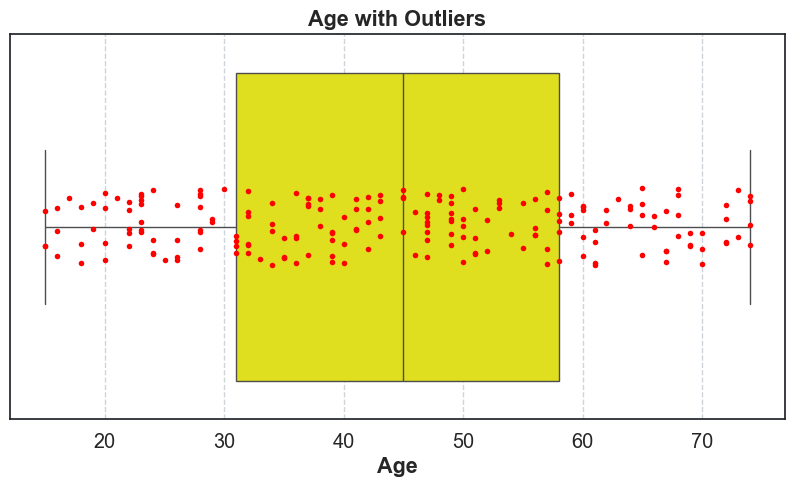

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'], color='yellow')
sns.stripplot(x=df['Age'], color='red', size=4, jitter=True)
plt.title("Age with Outliers")
plt.show()


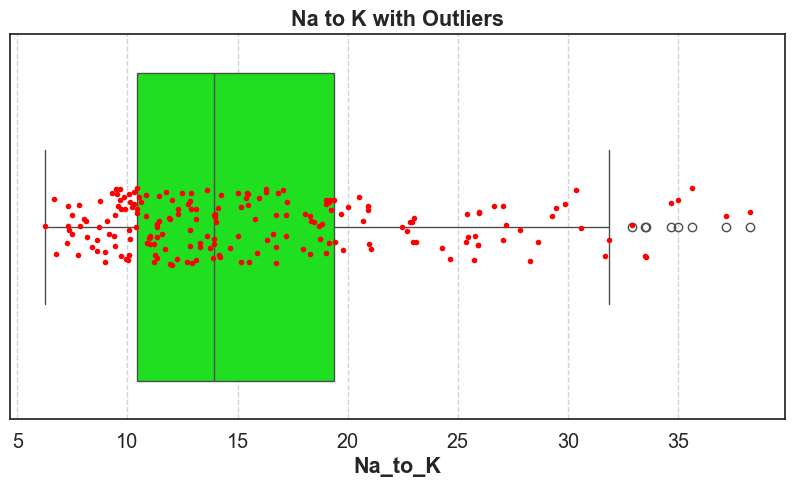

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Na_to_K'], color='lime')
sns.stripplot(x=df['Na_to_K'], color='red', size=4, jitter=True)
plt.title("Na to K with Outliers")
plt.show()

In [12]:
print(df['Sex'].value_counts())
print(df['BP'].value_counts())
print(df['Cholesterol'].value_counts())
print(df['Drug'].value_counts())

Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


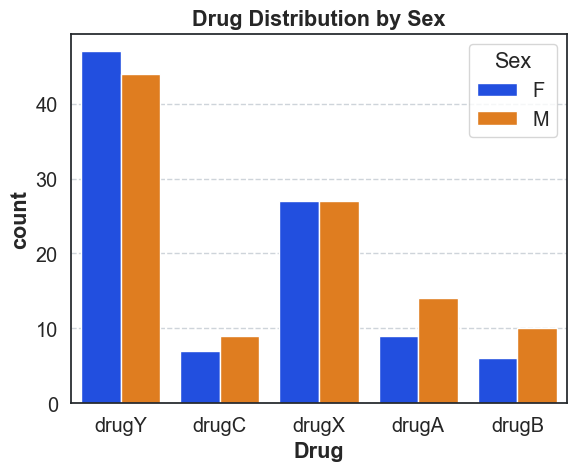

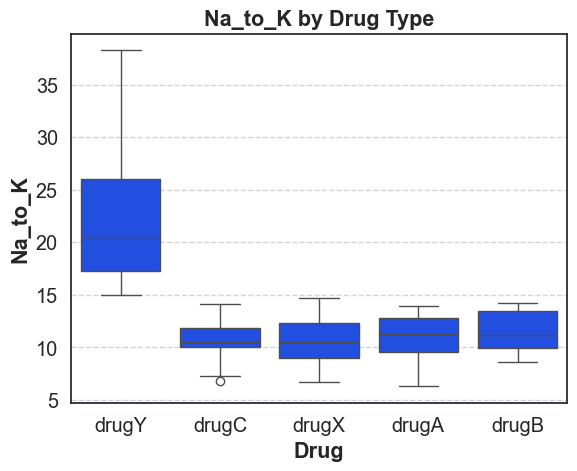

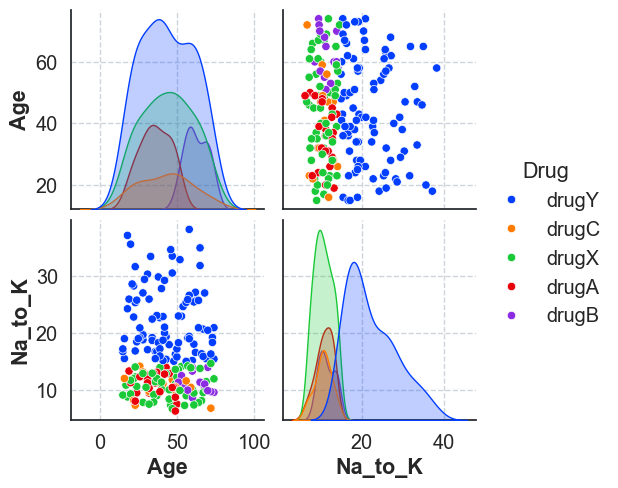

In [13]:
sns.countplot(data=df, x='Drug', hue='Sex')
plt.title("Drug Distribution by Sex")
plt.show()

sns.boxplot(data=df, x='Drug', y='Na_to_K')
plt.title("Na_to_K by Drug Type")
plt.show()

sns.pairplot(df, hue='Drug')


<Axes: >

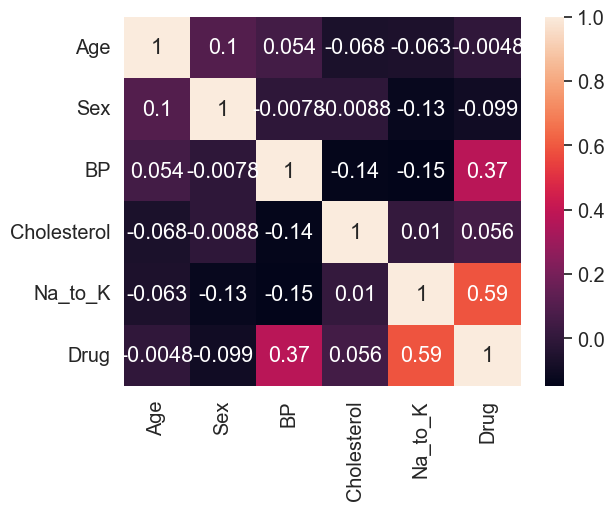

In [14]:
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

sns.heatmap(df_encoded.corr(), annot=True)


---
# Understanding the data
---
| Feature         | Meaning                                      | Type                 | Impact                                                           |
| --------------- | -------------------------------------------- | -------------------- | ---------------------------------------------------------------- |
| **Age**         | Patient's age in years                       | Numerical            | May affect metabolism, drug tolerance                            |
| **Sex**         | Gender (`M`, `F`)                            | Categorical          | Minor influence; sometimes hormonal interactions                 |
| **BP**          | Blood pressure (`LOW`, `NORMAL`, `HIGH`)     | Categorical          | Indicates heart stress; important for cardiovascular drugs       |
| **Cholesterol** | Cholesterol level (`NORMAL`, `HIGH`)         | Categorical          | Tied to heart health, affects certain drug prescriptions         |
| **Na\_to\_K**   | Sodium to Potassium ratio in blood           | Numerical            | Crucial indicator of **electrolyte balance** and kidney function |
| **Drug**        | The prescribed drug (`DrugA`, `DrugB`, etc.) | Categorical (Target) | What we’re trying to predict                                    |


---

## Drug Y

- **Na_to_K**: Very High
- **Blood Pressure (BP)**: Often NORMAL or HIGH
- **Age / Sex**: Mixed distribution

**Interpretation:**  
Drug Y appears to be prescribed in cases of **severe electrolyte imbalance** — particularly where sodium levels are high relative to potassium. This may represent a **potassium-sparing** or **diuretic-like** medication.

---

##  Drug X

- **Na_to_K**: Moderate or slightly elevated
- **BP**: Often NORMAL
- **Cholesterol**: Often NORMAL

**Interpretation:**  
Drug X seems like a **general-purpose** prescription. Used in relatively stable patients with mild abnormalities. Likely a **first-line treatment** when no major risk factors exist.

---

##  Drug A

- **BP**: HIGH
- **Cholesterol**: HIGH
- **Na_to_K**: Average

**Interpretation:**  
Drug A looks like a **primary cardiovascular drug**, prescribed to patients with **high blood pressure and high cholesterol**. Likely aims to reduce cardiac risk.

---

##  Drug B

- **BP**: LOW
- **Cholesterol**: HIGH
- **Na_to_K**: Moderate

**Interpretation:**  
Drug B may target patients with **low blood pressure but high cholesterol**, suggesting a **gentler intervention** that avoids further BP reduction.

---

##  Drug C

- **BP**: LOW
- **Cholesterol**: NORMAL
- **Na_to_K**: Normal or slightly low

**Interpretation:**  
Drug C is likely a **preventive or low-risk** prescription for patients with low BP and normal vitals — possibly maintenance or mild treatment.

---

##  Summary Table

| Patient Profile                         | Likely Drug  |
|----------------------------------------|--------------|
| Very high Na_to_K                      | Drug Y       |
| High BP + High Cholesterol             | Drug A       |
| Low BP + High Cholesterol              | Drug B       |
| Low BP + Normal Cholesterol            | Drug C       |
| Balanced but slightly abnormal values  | Drug X       |


 # Making Decision trees Now

In [15]:
# Encode Categorical Variables
df_encoded = df.copy()

le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df_encoded["Sex"] = le_sex.fit_transform(df["Sex"])               # M=1, F=0
df_encoded["BP"] = le_bp.fit_transform(df["BP"])                  # HIGH=0, LOW=1, NORMAL=2
df_encoded["Cholesterol"] = le_chol.fit_transform(df["Cholesterol"])  # HIGH=0, NORMAL=1
df_encoded["Drug"] = le_drug.fit_transform(df["Drug"])            # Classes encoded 0–4


### Defining Features and Target

In [16]:
X = df_encoded.drop("Drug", axis=1)
y = df_encoded["Drug"]


### Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69, stratify=y
)


### Train the Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", random_state=69)
clf.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,69
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evaluate the Model

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
 [[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]


### Visualize the Decision Tree

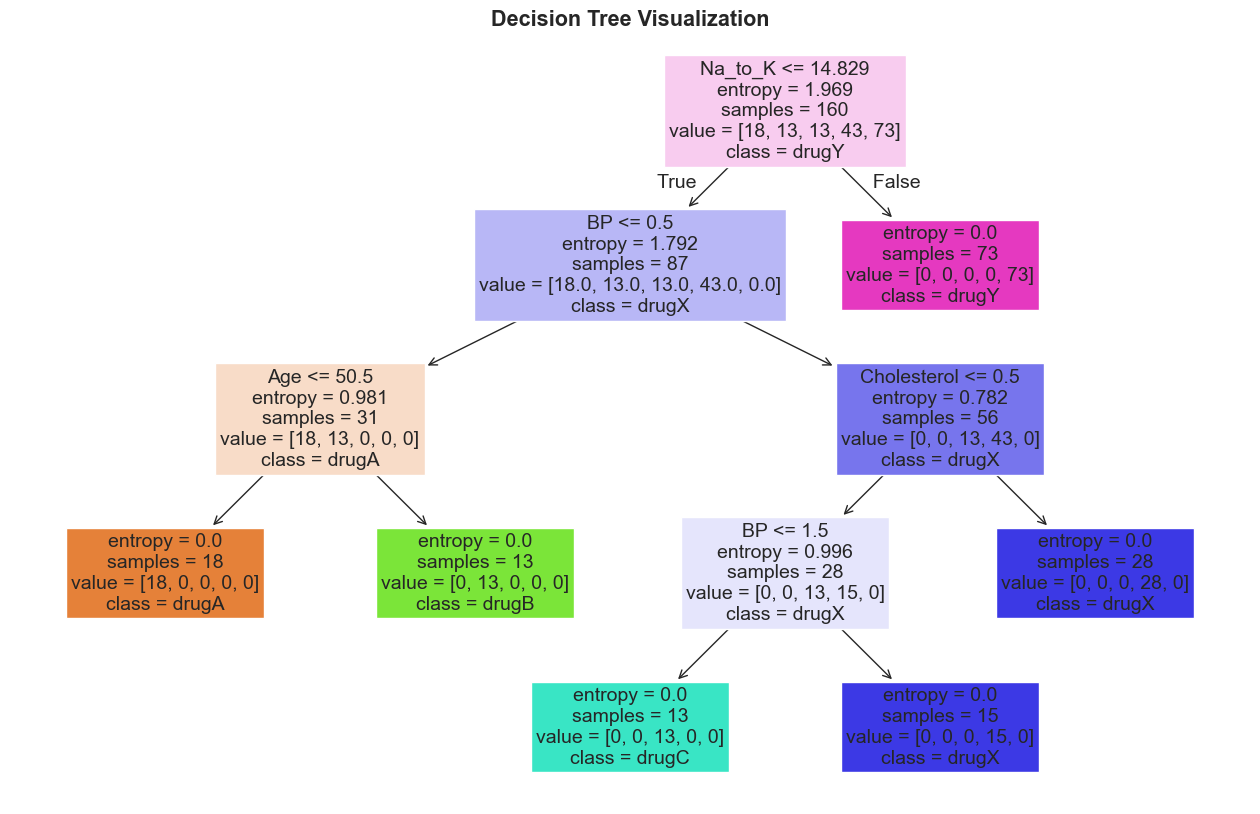

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=X.columns, class_names=le_drug.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


### Check Feature Importance

In [21]:
for name, importance in zip(X.columns, clf.feature_importances_):
    print(f"{name}: {importance:.4f}")


Age: 0.0965
Sex: 0.0000
BP: 0.3480
Cholesterol: 0.0504
Na_to_K: 0.5050


In [22]:
# as we can see Na to K ratio dominates
# Sex has no importance , age as well
# BP has minor significance

# Animation

In [46]:
df = pd.read_csv('drug200.csv')
data = {'Age': [23, 47, 47, 28, 61], 'Sex': ['F', 'M', 'M', 'F', 'F'],
            'BP': ['HIGH', 'LOW', 'LOW', 'NORMAL', 'LOW'],
            'Cholesterol': ['HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH'],
            'Na_to_K': [25.355, 13.093, 10.114, 7.798, 18.043],
            'Drug': ['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY']}
df = pd.DataFrame(data)

# Preprocessing
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

# Define features and target
feature_columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[feature_columns]
y = df['Drug']

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)
print("Model trained successfully!")


def animate_decision_path(tree, feature_names, input_df):
    X = input_df.values.astype('float32')
    node_indicator = tree.decision_path(X)
    node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]
    
    print(" Following the Decision Tree Path...\n")
    time.sleep(1)
    
    for i, node_id in enumerate(node_index):
        indent = "  " * i
        if tree.feature[node_id] != -2: # Not a leaf node
            name = feature_names[tree.feature[node_id]]
            threshold = round(tree.threshold[node_id], 2)
            val = round(X[0, tree.feature[node_id]], 2)
            
            print(f"{indent}Node {node_id}: Is feature '{name}' (value: {val}) <= {threshold}?")
            time.sleep(1.5)
            
            if val <= threshold:
                print(f"{indent}  -> YES. Following left path.")
            else:
                print(f"{indent}  -> NO. Following right path.")
            print("-" * 40)
        else: # Leaf node
            print(f"\n{indent} Reached Leaf Node {node_id}.")
        
        time.sleep(1)


age = widgets.IntSlider(value=30, min=15, max=80, description='Age:')
sex = widgets.Dropdown(options=['M', 'F'], description='Sex:')
bp = widgets.Dropdown(options=le_bp.classes_, description='BP:')
chol = widgets.Dropdown(options=le_chol.classes_, description='Cholesterol:')
na_to_k = widgets.FloatSlider(value=15.0, min=5.0, max=40.0, step=0.1, description='Na/K:')
submit_btn = widgets.Button(description="Predict Drug", button_style='success', icon='magic')
output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output() 
        input_data = {
            'Age': age.value,
            'Sex': le_sex.transform([sex.value])[0],
            'BP': le_bp.transform([bp.value])[0],
            'Cholesterol': le_chol.transform([chol.value])[0],
            'Na_to_K': na_to_k.value
        }
        input_df = pd.DataFrame([input_data], columns=feature_columns)
        
        try:
            print("Starting prediction...\n")
            time.sleep(0.5)
            
            # Call the corrected animation function
            animate_decision_path(clf.tree_, feature_columns, input_df)
            
            # Get the final prediction
            pred_encoded = clf.predict(input_df)[0]
            pred_drug = le_drug.inverse_transform([pred_encoded])[0]
            
            print(f"\n Final Prediction: The recommended drug is {pred_drug}")
            
        except Exception as e:
            print(f" An error occurred during prediction: {e}")

submit_btn.on_click(on_button_click)
display(age, sex, bp, chol, na_to_k, submit_btn, output)


Model trained successfully!


IntSlider(value=30, description='Age:', max=80, min=15)

Dropdown(description='Sex:', options=('M', 'F'), value='M')

Dropdown(description='BP:', options=('HIGH', 'LOW', 'NORMAL'), value='HIGH')

Dropdown(description='Cholesterol:', options=('HIGH', 'NORMAL'), value='HIGH')

FloatSlider(value=15.0, description='Na/K:', max=40.0, min=5.0)

Button(button_style='success', description='Predict Drug', icon='magic', style=ButtonStyle())

Output()

# Implementing Random Forest

In [24]:
# Encode categorical columns manually:
df['Sex'] = df['Sex'].map({'M':1, 'F':0})
df['BP'] = df['BP'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL':0, 'HIGH':1})

# Features and target
X = df.drop(columns=['Drug'])
y = df['Drug']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22, stratify=y)


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_clf = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=None,          # trees grow fully
    random_state=22
)

# Train
rf_clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_clf.predict(X_test)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on test set: 1.0

Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
 [[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]


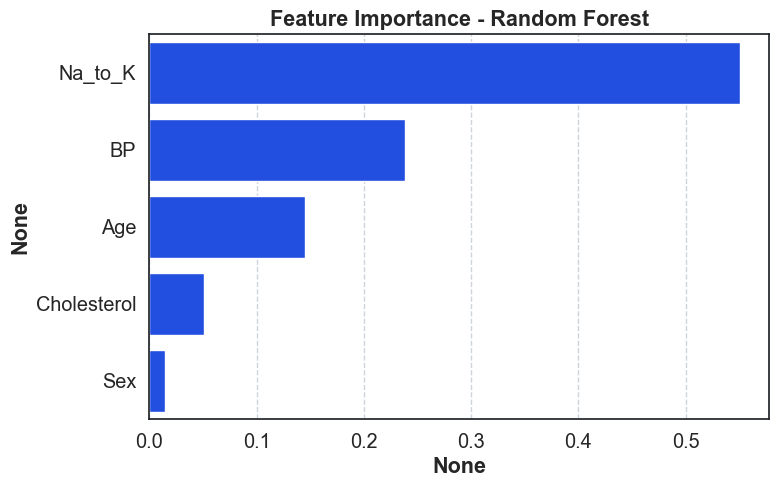

In [28]:

feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()


In [29]:
def predict_drug(age, sex, bp, chol, na_to_k):
    # Encode inputs same way
    sex_enc = 1 if sex == 'M' else 0
    bp_enc = {'LOW':0, 'NORMAL':1, 'HIGH':2}[bp]
    chol_enc = {'NORMAL':0, 'HIGH':1}[chol]
    
    input_df = pd.DataFrame([{
        'Age': age,
        'Sex': sex_enc,
        'BP': bp_enc,
        'Cholesterol': chol_enc,
        'Na_to_K': na_to_k
    }])
    
    pred = rf_clf.predict(input_df)[0]
    return pred

# Example:
print(predict_drug(50, 'F', 'HIGH', 'NORMAL', 15.0))


drugY


# Implementing SVM 

In [30]:
import pandas as pd

# Load dataset
df = pd.read_csv('drug200.csv')

# Encode categorical features
df['Sex'] = df['Sex'].map({'M':1, 'F':0})
df['BP'] = df['BP'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL':0, 'HIGH':1})

X = df.drop(columns=['Drug'])
y = df['Drug']



In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=34, stratify=y)


In [33]:
from sklearn.svm import SVC

svm_clf = SVC(
    kernel='rbf',    # Try 'linear' first, then 'rbf' if nonlinear
    C=1.0,           # Regularization parameter
    gamma='scale',   # Kernel coefficient for ‘rbf’
    random_state=81
)

svm_clf.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_clf.predict(X_test)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on test set: 1.0

Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
 [[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]


In [35]:
def predict_svm(age, sex, bp, chol, na_to_k):
    sex_enc = 1 if sex == 'M' else 0
    bp_enc = {'LOW':0, 'NORMAL':1, 'HIGH':2}[bp]
    chol_enc = {'NORMAL':0, 'HIGH':1}[chol]
    
    input_df = pd.DataFrame([{
        'Age': age,
        'Sex': sex_enc,
        'BP': bp_enc,
        'Cholesterol': chol_enc,
        'Na_to_K': na_to_k
    }])
    
    input_scaled = scaler.transform(input_df)  # scale input features
    pred = svm_clf.predict(input_scaled)[0]
    return pred

# Example:
print(predict_svm(45, 'F', 'NORMAL', 'HIGH', 12.5))


drugX


# Implementation KNN 

In [36]:
import pandas as pd

# Load data
df = pd.read_csv('drug200.csv')

# Encode categorical features
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})

# Feature matrix and labels
X = df.drop(columns=['Drug'])
y = df['Drug']


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # You can tune 'k'
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy: 0.8

 Classification Report:
               precision    recall  f1-score   support

       drugA       0.50      0.80      0.62         5
       drugB       0.50      0.67      0.57         3
       drugC       0.75      1.00      0.86         3
       drugX       0.92      1.00      0.96        11
       drugY       1.00      0.67      0.80        18

    accuracy                           0.80        40
   macro avg       0.73      0.83      0.76        40
weighted avg       0.86      0.80      0.81        40


 Confusion Matrix:
 [[ 4  1  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 3  1  1  1 12]]


In [41]:
def predict_knn(age, sex, bp, chol, na_to_k):
    input_df = pd.DataFrame([{
        'Age': age,
        'Sex': 1 if sex == 'M' else 0,
        'BP': {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}[bp],
        'Cholesterol': {'NORMAL': 0, 'HIGH': 1}[chol],
        'Na_to_K': na_to_k
    }])

    input_scaled = scaler.transform(input_df)
    return knn.predict(input_scaled)[0]

# Example usage:
print(predict_knn(45, 'F', 'NORMAL', 'HIGH', 12.5))


drugX


Successfully loaded drug200.csv

--- Exploratory Data Analysis ---
Dataset Description:
               Age  Sex    BP Cholesterol     Na_to_K   Drug
count   200.000000  200   200         200  200.000000    200
unique         NaN    2     3           2         NaN      5
top            NaN    M  HIGH        HIGH         NaN  drugY
freq           NaN  104    77         103         NaN     91
mean     44.315000  NaN   NaN         NaN   16.084485    NaN
std      16.544315  NaN   NaN         NaN    7.223956    NaN
min      15.000000  NaN   NaN         NaN    6.269000    NaN
25%      31.000000  NaN   NaN         NaN   10.445500    NaN
50%      45.000000  NaN   NaN         NaN   13.936500    NaN
75%      58.000000  NaN   NaN         NaN   19.380000    NaN
max      74.000000  NaN   NaN         NaN   38.247000    NaN


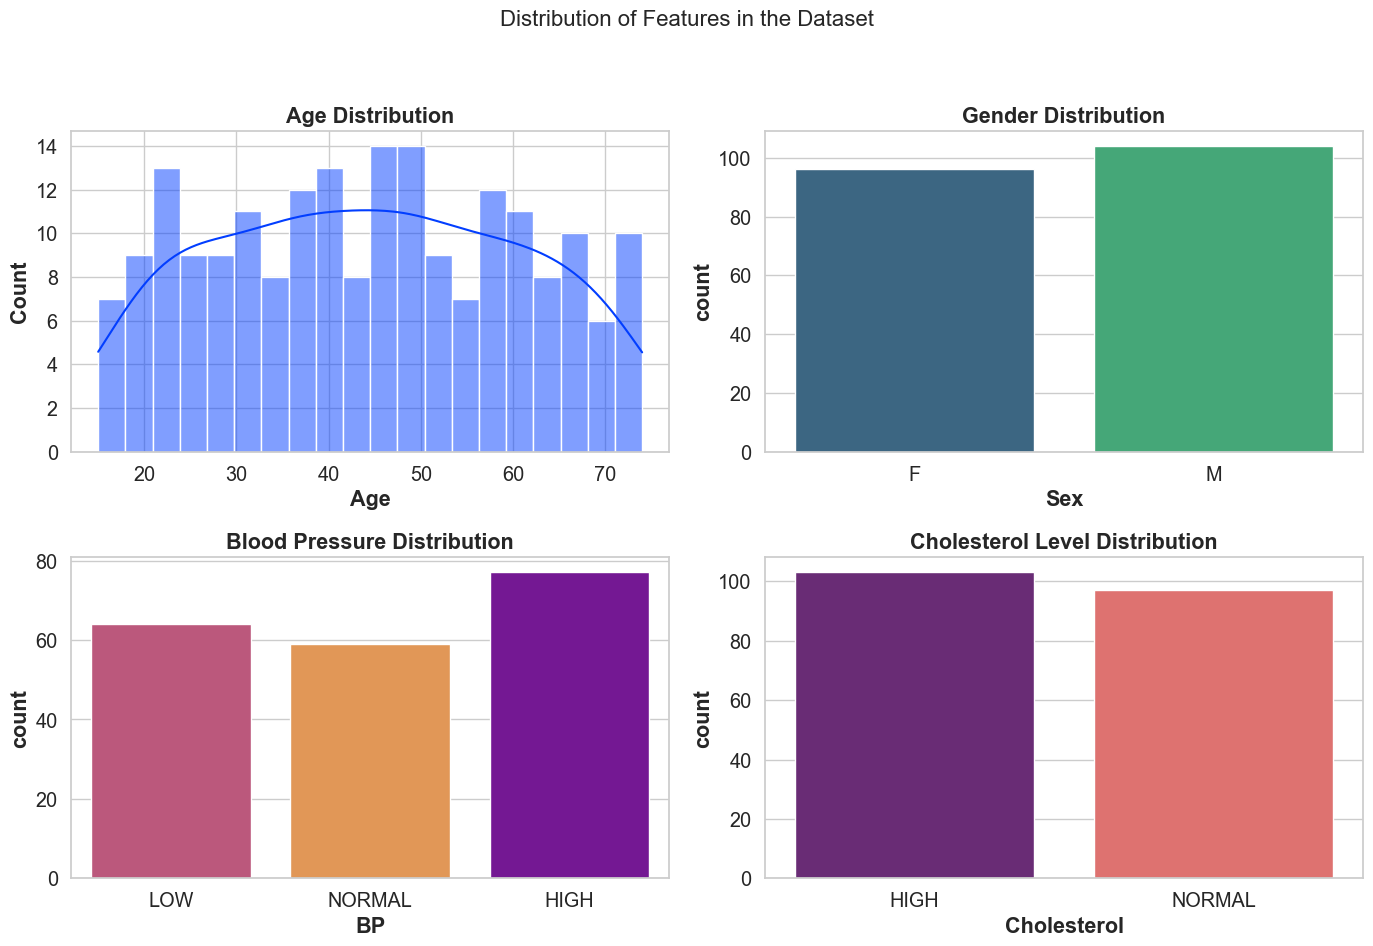


--- Preprocessing Data for Modeling ---
Features (X) head:
   Age  Sex  BP  Cholesterol  Na_to_K
0   23    0   0            0   25.355
1   47    1   1            0   13.093
2   47    1   1            0   10.114
3   28    0   2            0    7.798
4   61    0   1            0   18.043

Data split into 140 training samples and 60 testing samples.

--- Training K-Nearest Neighbors (KNN) Model ---
Model trained successfully with k=5.

--- Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

       drugA       0.27      0.43      0.33         7
       drugB       0.17      0.33      0.22         3
       drugC       0.33      0.17      0.22         6
       drugX       0.50      0.39      0.44        18
       drugY       1.00      1.00      1.00        26

    accuracy                           0.63        60
   macro avg       0.45      0.46      0.44        60
weighted avg       0.66      0.63      0.64        60


--- Visualizing Model Pe

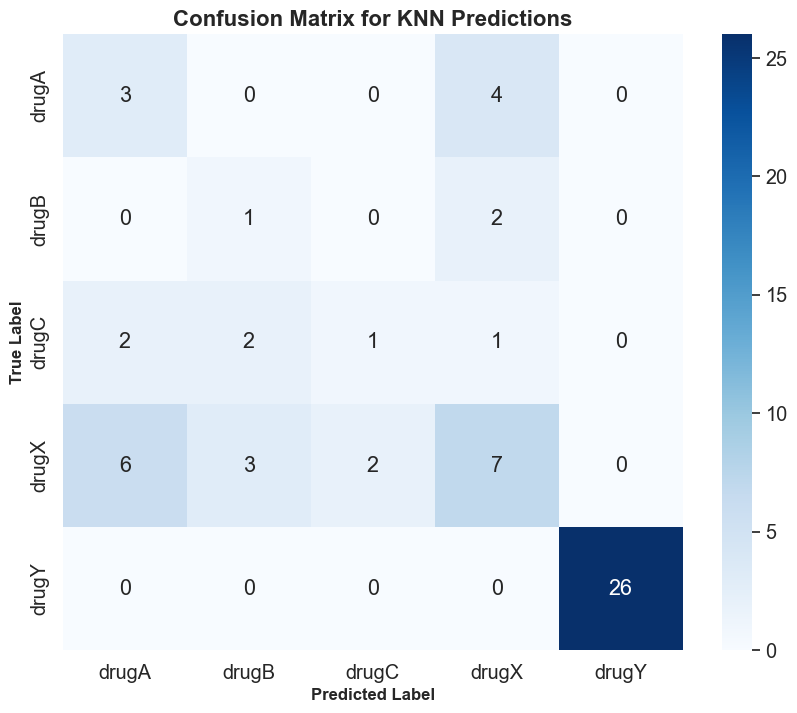

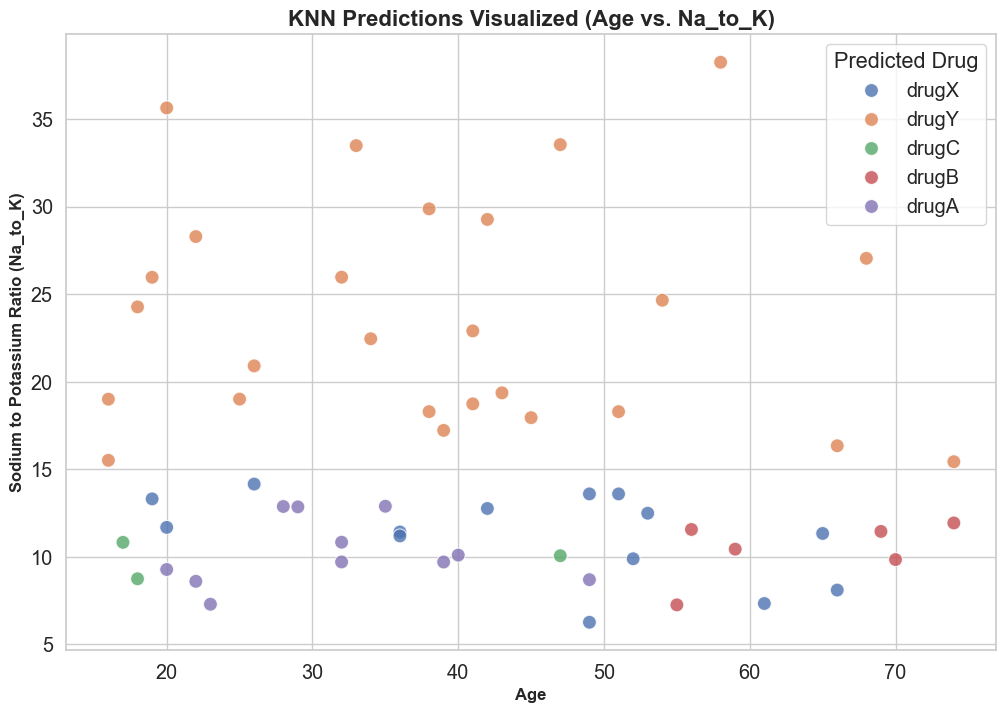

In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Attempt to load the dataset, create a synthetic one if it's not found
try:
    df = pd.read_csv('drug200.csv')
    print("Successfully loaded drug200.csv")
except FileNotFoundError:
    print("drug200.csv not found. Creating a synthetic dataset for demonstration.")
    # Create a synthetic dataset that mimics the structure and distribution
    np.random.seed(42)
    n_samples = 200
    data = {
        'Age': np.random.randint(15, 80, n_samples),
        'Sex': np.random.choice(['F', 'M'], n_samples, p=[0.48, 0.52]),
        'BP': np.random.choice(['LOW', 'NORMAL', 'HIGH'], n_samples),
        'Cholesterol': np.random.choice(['NORMAL', 'HIGH'], n_samples, p=[0.56, 0.44]),
        'Na_to_K': np.random.uniform(5, 40, n_samples),
        'Drug': np.random.choice(['DrugA', 'DrugB', 'DrugC', 'DrugX', 'DrugY'], n_samples)
    }
    df = pd.DataFrame(data)

# Create a copy for EDA to keep original labels
df_eda = df.copy()


# -------------------------------------------
# --- Step 2: Exploratory Data Analysis (EDA) ---
# -------------------------------------------

# --- Step 2: Exploratory Data Analysis (EDA) ---
print("\n--- Exploratory Data Analysis ---")
print("Dataset Description:")
print(df_eda.describe(include='all'))

# Set plot style
sns.set_style("whitegrid")

# Create plots for feature distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Features in the Dataset', fontsize=16)

# --- No changes needed for histplot ---
sns.histplot(ax=axes[0, 0], data=df_eda, x='Age', kde=True, bins=20)
axes[0, 0].set_title('Age Distribution')

# --- CORRECTED CODE for countplots ---
# Assign 'Sex' to hue and disable the redundant legend
sns.countplot(ax=axes[0, 1], data=df_eda, x='Sex', hue='Sex', palette='viridis', legend=False)
axes[0, 1].set_title('Gender Distribution')

# Assign 'BP' to hue and disable the redundant legend
sns.countplot(ax=axes[1, 0], data=df_eda, x='BP', hue='BP', palette='plasma', order=['LOW', 'NORMAL', 'HIGH'], legend=False)
axes[1, 0].set_title('Blood Pressure Distribution')

# Assign 'Cholesterol' to hue and disable the redundant legend
sns.countplot(ax=axes[1, 1], data=df_eda, x='Cholesterol', hue='Cholesterol', palette='magma', legend=False)
axes[1, 1].set_title('Cholesterol Level Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# ------------------------------------------------
# --- Step 3: Data Preprocessing for Modeling ----
# ------------------------------------------------
print("\n--- Preprocessing Data for Modeling ---")

# Encode categorical features into numerical values
# Using LabelEncoder is a robust way to handle this
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])

# Define features (X) and target (y)
X = df.drop('Drug', axis=1)
y = le_drug.fit_transform(df['Drug'])
drug_classes = le_drug.classes_

print("Features (X) head:")
print(X.head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nData split into {len(X_train)} training samples and {len(X_test)} testing samples.")


# -------------------------------------------
# --- Step 4: KNN Modeling & Evaluation -----
# -------------------------------------------
print("\n--- Training K-Nearest Neighbors (KNN) Model ---")

# Initialize and train the KNN model
# k=5 is a common starting point
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Model trained successfully with k=5.")

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("\n--- Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=drug_classes, zero_division=0))


# -------------------------------------------
# --- Step 5: Visualizing the Results -------
# -------------------------------------------
print("\n--- Visualizing Model Performance ---")

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=drug_classes, yticklabels=drug_classes)
plt.title('Confusion Matrix for KNN Predictions', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


# 2. Scatter Plot of Predictions
# Add predictions to the test set for visualization
X_test_vis = X_test.copy()
X_test_vis['Predicted_Drug'] = le_drug.inverse_transform(y_pred)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_test_vis, x='Age', y='Na_to_K', hue='Predicted_Drug',
                palette='deep', s=100, alpha=0.8)
plt.title('KNN Predictions Visualized (Age vs. Na_to_K)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Sodium to Potassium Ratio (Na_to_K)', fontsize=12)
plt.legend(title='Predicted Drug')
plt.show()
